In [1]:
import numpy as np

In [2]:
import re

In [3]:
import scipy

In [4]:
import scipy.optimize

In [5]:
import math

In [6]:
from matplotlib import pyplot as plt

# Кошки

In [33]:
with open('./sentences.txt', 'r') as f:
    data = f.read()

In [34]:
sentences = []
for i in data.splitlines():
    sentences.append(i.lower())

In [35]:
sentences

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [36]:
slova = set()
for i in sentences:
    slova = slova | set(re.split('[^a-z]', i))

In [37]:
if '' in slova:
    slova.remove('')
slova = list(slova)

In [38]:
d = {}
for i in range(len(slova)):
    d[slova[i]] = i

In [39]:
len(slova)

254

In [40]:
d

{'some': 0,
 'separate': 1,
 'allows': 2,
 'download': 3,
 'processors': 4,
 'to': 5,
 'learned': 6,
 'leopard': 7,
 'fifth': 8,
 'vermin': 9,
 'members': 10,
 'wrong': 11,
 'streams': 12,
 'however': 13,
 'started': 14,
 'using': 15,
 'major': 16,
 'similar': 17,
 'you': 18,
 'run': 19,
 'online': 20,
 'july': 21,
 'domestic': 22,
 'that': 23,
 'simply': 24,
 'undergone': 25,
 'permanently': 26,
 'features': 27,
 'every': 28,
 'single': 29,
 'available': 30,
 'hear': 31,
 'yosemite': 32,
 'the': 33,
 'often': 34,
 's': 35,
 'releasing': 36,
 'os': 37,
 'later': 38,
 'common': 39,
 'of': 40,
 'in': 41,
 'versions': 42,
 'update': 43,
 'released': 44,
 'not': 45,
 't': 46,
 'has': 47,
 'longer': 48,
 'intel': 49,
 'editions': 50,
 'concern': 51,
 'non': 52,
 'people': 53,
 'store': 54,
 'recent': 55,
 'cat': 56,
 'standard': 57,
 'received': 58,
 'upgrade': 59,
 'weighing': 60,
 'apple': 61,
 'between': 62,
 'was': 63,
 'clear': 64,
 'predators': 65,
 'second': 66,
 'dogs': 67,
 'new': 

In [41]:
matrix = []
for j in sentences: 
    pred = re.split('[^a-z]', j)
    pred = [i for i in pred if i != '']
    sp = [0] * len(d)
    for z in pred:
        sp[d[z]] += 1
    matrix.append(sp)    

In [43]:
matrix = np.array(matrix)

In [44]:
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
otvet = [scipy.spatial.distance.cosine(matrix[0], matrix[i+1]) for i in range(len(matrix)-1)]

In [48]:
otvet

[0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [51]:
sentences

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [52]:
with open('./otvet1.txt', 'w') as f:
    f.write('4 6')

# многочлены

In [122]:
x1 = 1
x2 = 15
x3 = 4
x4 = 10

In [123]:
def f1(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

In [124]:
a = np.array([[1, x1, x1**2, x1**3], [1, x2, x2**2, x2**3], [1, x3, x3**2, x3**3], [1, x4, x4**2, x4**3]])

In [125]:
f = np.array([f1(x1), f1(x2), f1(x3), f1(x4)])
f = f.reshape(4,1)

In [126]:
a

array([[   1,    1,    1,    1],
       [   1,   15,  225, 3375],
       [   1,    4,   16,   64],
       [   1,   10,  100, 1000]])

In [127]:
f

array([[3.25221687],
       [0.63522142],
       [1.74684595],
       [2.50541641]])

In [128]:
w = np.linalg.solve(a, f)

In [118]:
w

array([[ 4.65237794],
       [-1.67701214],
       [ 0.28991565],
       [-0.01306459]])

In [119]:
def f2(x):
    return 1 * w[0] + x * w[1] + w[2] * x ** 2 + w[3] * x ** 3

In [137]:
obl = np.linspace(1, 15,100)

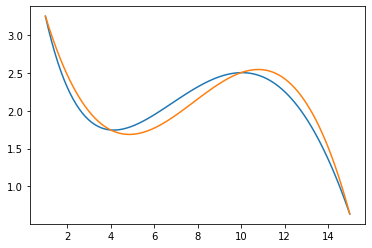

In [138]:
plt.plot(obl, [f1(i) for i in obl])
plt.plot(obl, [f2(i) for i in obl])

In [139]:
with open('./otvet2.txt', 'w') as f:
    f.write('4.36 -1.30 0.19 -0.01')

# Градиент

In [244]:
def f1(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

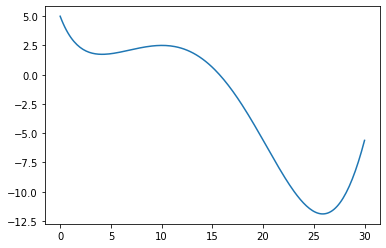

In [245]:
plt.plot(np.linspace(0, 30,200), [f1(i) for i in np.linspace(0, 30,200)])

In [251]:
scipy.optimize.minimize(f1, 1)

      fun: 1.7452682903321932
 hess_inv: array([[6.01546361]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.13628706])

In [141]:
scipy.optimize.minimize(f1, 2)

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

In [140]:
scipy.optimize.minimize(f1, 30)

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

In [272]:
scipy.optimize.minimize(f1, 30, method='BFGS')

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

In [268]:
with open('./otvet3.txt', 'w') as f:
    f.write('1.75 -11.90')

# differential_evolution

In [144]:
scipy.optimize.differential_evolution(f1, [(0, 30)])

     fun: -11.898894665970404
     jac: array([3.55271338e-06])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 3
 success: True
       x: array([25.88019909])

In [282]:
with open('./otvet4.txt', 'w') as f:
    f.write('-11.90')

# Негладкая функция

In [145]:
def h(x):
    return int(f1(x))

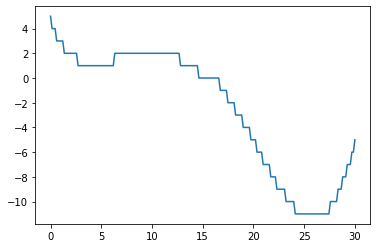

In [146]:
plt.plot(np.linspace(0, 30,200), [h(i) for i in np.linspace(0, 30,200)])

In [158]:
scipy.optimize.minimize(h, 30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [156]:
scipy.optimize.differential_evolution(h, [(0, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([24.44273695])

In [159]:
with open('./otvet5.txt', 'w') as f:
    f.write('-5 -11.0')